In [1]:
import numpy as np
import pandas as pd

##Loading Data

In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544)

# data (as pandas dataframes)
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets

# metadata
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.metadata)

# variable information
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.variables)


{'uci_id': 544, 'name': 'Estimation of Obesity Levels Based On Eating Habits and Physical Condition ', 'repository_url': 'https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition', 'data_url': 'https://archive.ics.uci.edu/static/public/544/data.csv', 'abstract': 'This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 2111, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': ['Gender', 'Age'], 'target_col': ['NObeyesdad'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Tue Sep 10 2024', 'dataset_doi': '10.24432/C5H31Z', 'creators': [], 'intro_paper': {'ID': 358, 'type': 

In [4]:
X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation


In [5]:
y.head()

,NObeyesdad
0,Normal_Weight
1,Normal_Weight
2,Normal_Weight
3,Overweight_Level_I
4,Overweight_Level_II


## Preprocessing the Data

**Dropping missing values from X and y:**

In [6]:
X = X.dropna()

In [7]:
y = y.dropna()

#### Importing Relevant Sci-kit Learn Libraries for Data Preprocessing

In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

When observing the data, there are three types of data types:
1. Binary Values
2. Categorical
3. numerical

In order to prepare the data for a Neural Network. All the Categorical data types be converted to numerical forms either in binary form or they will be numerically encoded.

In [9]:
# Binary Columns in the dataset
Binary_Columns = ['Gender','family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']

# Label Encoding all binary columns
label_encoder = LabelEncoder()

for col in Binary_Columns:
    X[col] = label_encoder.fit_transform(X[col])

In [10]:
X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,21.0,1.62,64.0,1,0,2.0,3.0,Sometimes,0,2.0,0,0.0,1.0,no,Public_Transportation
1,0,21.0,1.52,56.0,1,0,3.0,3.0,Sometimes,1,3.0,1,3.0,0.0,Sometimes,Public_Transportation
2,1,23.0,1.80,77.0,1,0,2.0,3.0,Sometimes,0,2.0,0,2.0,1.0,Frequently,Public_Transportation
3,1,27.0,1.80,87.0,0,0,3.0,3.0,Sometimes,0,2.0,0,2.0,0.0,Frequently,Walking
4,1,22.0,1.78,89.8,0,0,2.0,1.0,Sometimes,0,2.0,0,0.0,0.0,Sometimes,Public_Transportation


In [11]:
# Identify columns with more than two unique categories
multi_categorical_columns = X.columns[X.nunique() > 2]

# Print multi-categorical columns
print(multi_categorical_columns)


Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF', 'TUE',
       'CALC', 'MTRANS'],
      dtype='object')


In [12]:
# Apply get_dummies() to encode all categorical columns
X_encoded = pd.get_dummies(X, drop_first=True)

In [13]:
X_encoded.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21.0,1.62,64.0,1,0,2.0,3.0,0,2.0,...,False,True,False,False,False,True,False,False,True,False
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,3.0,...,False,True,False,False,True,False,False,False,True,False
2,1,23.0,1.80,77.0,1,0,2.0,3.0,0,2.0,...,False,True,False,True,False,False,False,False,True,False
3,1,27.0,1.80,87.0,0,0,3.0,3.0,0,2.0,...,False,True,False,True,False,False,False,False,False,True
4,1,22.0,1.78,89.8,0,0,2.0,1.0,0,2.0,...,False,True,False,False,True,False,False,False,True,False


In [14]:
boolean_columns = X_encoded.columns[X_encoded.dtypes == 'bool']

In [15]:
X_encoded[boolean_columns] = X_encoded[boolean_columns].astype(int)

In [16]:
X = X_encoded

In [17]:
X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21.0,1.62,64.0,1,0,2.0,3.0,0,2.0,...,0,1,0,0,0,1,0,0,1,0
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,3.0,...,0,1,0,0,1,0,0,0,1,0
2,1,23.0,1.80,77.0,1,0,2.0,3.0,0,2.0,...,0,1,0,1,0,0,0,0,1,0
3,1,27.0,1.80,87.0,0,0,3.0,3.0,0,2.0,...,0,1,0,1,0,0,0,0,0,1
4,1,22.0,1.78,89.8,0,0,2.0,1.0,0,2.0,...,0,1,0,0,1,0,0,0,1,0


In [18]:
# Normalising Numerical Columns
numerical_columns = ['Age', 'Height', 'Weight', 'NCP','CH2O', 'FAF']

scaler = StandardScaler()

X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

In [19]:
X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,-0.522124,-0.875589,-0.862558,1,0,2.0,0.404153,0,-0.013073,...,0,1,0,0,0,1,0,0,1,0
1,0,-0.522124,-1.947599,-1.168077,1,0,3.0,0.404153,1,1.618759,...,0,1,0,0,1,0,0,0,1,0
2,1,-0.206889,1.054029,-0.366090,1,0,2.0,0.404153,0,-0.013073,...,0,1,0,1,0,0,0,0,1,0
3,1,0.423582,1.054029,0.015808,0,0,3.0,0.404153,0,-0.013073,...,0,1,0,1,0,0,0,0,0,1
4,1,-0.364507,0.839627,0.122740,0,0,2.0,-2.167023,0,-0.013073,...,0,1,0,0,1,0,0,0,1,0


In [20]:
y.head()

,NObeyesdad
0,Normal_Weight
1,Normal_Weight
2,Normal_Weight
3,Overweight_Level_I
4,Overweight_Level_II


In [21]:
# Count occurrences of each category
category_counts = y.value_counts()
print(category_counts)


NObeyesdad         
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


In [22]:
from sklearn.preprocessing import OneHotEncoder
# Encoding y dataframe
onehot_encoder = OneHotEncoder(sparse_output=False)

# Reshape y to a 2D array
y_reshaped = y.values.reshape(-1, 1)

# Fit and transform the target variable
y = onehot_encoder.fit_transform(y_reshaped)

# Verify the shape and result
print(y.shape)
print(y[:5])  # Print the first 5 rows to check the encoding


(2111, 7)
[[0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]


#### Splitting the Dataset

In [23]:
from sklearn.model_selection import train_test_split

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(1688, 23) (423, 23) (1688, 7) (423, 7)


## Building the Neural Network

In [24]:
import numpy as np

# Initialize the weights and biases
def initialize_parameters(input_size, hidden_size_1, hidden_size_2, output_size):
    np.random.seed(42)
    W1 = np.random.randn(input_size, hidden_size_1) * 0.01
    b1 = np.zeros((1, hidden_size_1))
    W2 = np.random.randn(hidden_size_1, hidden_size_2) * 0.01
    b2 = np.zeros((1, hidden_size_2))
    W3 = np.random.randn(hidden_size_2, output_size) * 0.01
    b3 = np.zeros((1, output_size))

    return W1, b1, W2, b2, W3, b3


In [25]:
# Activation functions and their derivatives
def relu(Z):
    return np.maximum(0, Z)

def relu_derivative(Z):
    return Z > 0

def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=1, keepdims=True))
    return expZ / np.sum(expZ, axis=1, keepdims=True)

# Loss function: Categorical Cross-Entropy
def cross_entropy_loss(y_true, y_pred):
    m = y_true.shape[0]
    return -np.sum(y_true * np.log(y_pred + 1e-8)) / m  # Adding epsilon to avoid log(0)


In [26]:
# Forward propagation
def forward_propagation(X, W1, b1, W2, b2, W3, b3):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = relu(Z2)
    Z3 = np.dot(A2, W3) + b3
    A3 = softmax(Z3)

    cache = (Z1, A1, Z2, A2, Z3, A3)
    return A3, cache


In [27]:
# Backward propagation
def backward_propagation(X, y_true, cache, W2, W3):
    Z1, A1, Z2, A2, Z3, A3 = cache
    m = y_true.shape[0]

    # Gradients for output layer
    dZ3 = A3 - y_true
    dW3 = np.dot(A2.T, dZ3) / m
    db3 = np.sum(dZ3, axis=0, keepdims=True) / m

    # Gradients for second hidden layer
    dA2 = np.dot(dZ3, W3.T)
    dZ2 = dA2 * relu_derivative(Z2)
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    # Gradients for first hidden layer
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    return dW1, db1, dW2, db2, dW3, db3


In [28]:
# Gradient Descent to update parameters
def update_parameters(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3

    return W1, b1, W2, b2, W3, b3


In [29]:
def train(X_train, y_train,input_size, hidden_size_1, hidden_size_2, output_size, learning_rate, epochs):
    # Initialize parameters
    W1, b1, W2, b2, W3, b3 = initialize_parameters(input_size, hidden_size_1, hidden_size_2, output_size)

    # To store loss and accuracy values
    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []

    for epoch in range(epochs):
        # Forward propagation on training data
        y_train_pred, cache_train = forward_propagation(X_train, W1, b1, W2, b2, W3, b3)

        # Compute training loss
        train_loss = cross_entropy_loss(y_train, y_train_pred)
        train_losses.append(train_loss)

        # Compute training accuracy
        train_accuracy = np.mean(np.argmax(y_train_pred, axis=1) == np.argmax(y_train, axis=1))
        train_accuracies.append(train_accuracy)

        # Backward propagation
        dW1, db1, dW2, db2, dW3, db3 = backward_propagation(X_train, y_train, cache_train, W2, W3)

        # Update parameters
        W1, b1, W2, b2, W3, b3 = update_parameters(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, learning_rate)

        # Print metrics every 100 epochs
        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Train Loss: {train_loss}, Train Accuracy: {train_accuracy}')

    return W1, b1, W2, b2, W3, b3, train_losses, train_accuracies


In [30]:
# Train the neural network
input_size = X_train.shape[1]
hidden_size_1 = 128
hidden_size_2 = 64
output_size = 7
learning_rate = 0.05
epochs = 2500

W1, b1, W2, b2, W3, b3, train_losses, train_accuracies, = train(
    X_train, y_train, input_size, hidden_size_1, hidden_size_2, output_size, learning_rate, epochs
)


Epoch 0, Train Loss: 1.9459232061399605, Train Accuracy: 0.08649289099526067
Epoch 100, Train Loss: 1.9436412516461736, Train Accuracy: 0.1617298578199052
Epoch 200, Train Loss: 1.943059547572458, Train Accuracy: 0.1617298578199052
Epoch 300, Train Loss: 1.9428343859861492, Train Accuracy: 0.1617298578199052
Epoch 400, Train Loss: 1.9426214000216744, Train Accuracy: 0.1617298578199052
Epoch 500, Train Loss: 1.9422427923184384, Train Accuracy: 0.1617298578199052
Epoch 600, Train Loss: 1.9413539896676741, Train Accuracy: 0.1617298578199052
Epoch 700, Train Loss: 1.938760842626439, Train Accuracy: 0.1617298578199052
Epoch 800, Train Loss: 1.9274552906459843, Train Accuracy: 0.2902843601895735
Epoch 900, Train Loss: 1.8352063647592145, Train Accuracy: 0.1593601895734597
Epoch 1000, Train Loss: 1.4472971474226595, Train Accuracy: 0.346563981042654
Epoch 1100, Train Loss: 1.0501376115543772, Train Accuracy: 0.634478672985782
Epoch 1200, Train Loss: 0.7792953679213888, Train Accuracy: 0.82109

In [31]:
# Predict
def predict(X, W1, b1, W2, b2, W3, b3):
    y_pred, _ = forward_propagation(X, W1, b1, W2, b2, W3, b3)
    return np.argmax(y_pred, axis=1)

# Predict using the test set
y_test_pred_class = predict(X_test, W1, b1, W2, b2, W3, b3)

# Compute test accuracy
test_accuracy = np.mean(y_test_pred_class == np.argmax(y_test, axis=1))
print(f'Test Accuracy: {test_accuracy}')


Test Accuracy: 0.9432624113475178


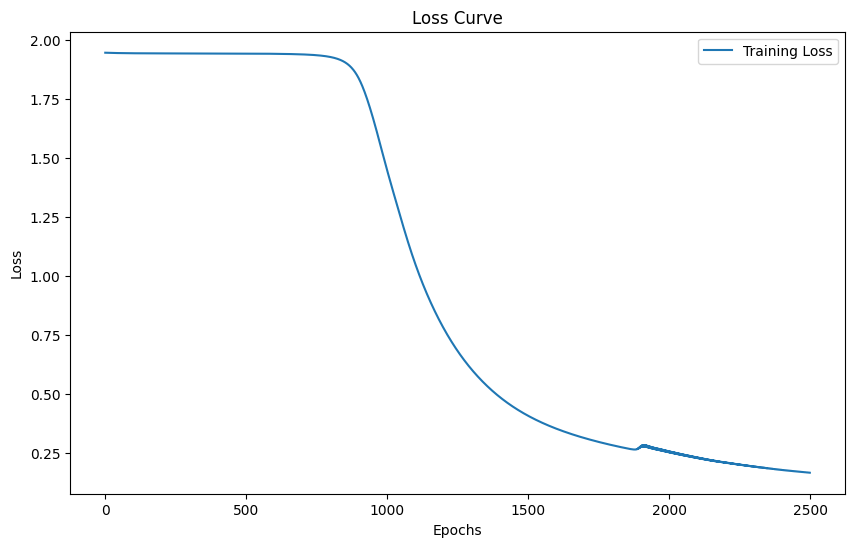

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


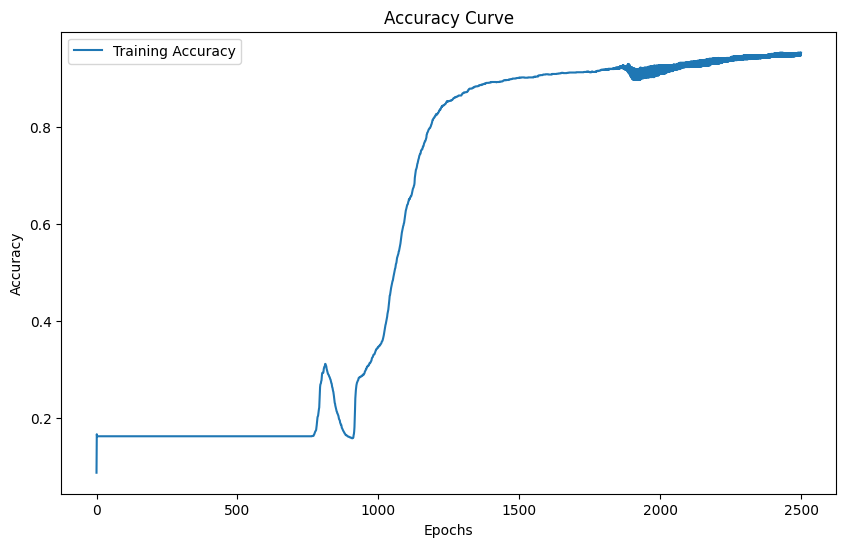

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(train_accuracies, label='Training Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [34]:
from sklearn.metrics import classification_report

# Actual test labels and predicted labels
y_test_true_class = np.argmax(y_test, axis=1)

# Classification report
print(classification_report(y_test_true_class, y_test_pred_class))


              precision    recall  f1-score   support

           0       0.86      1.00      0.93        56
           1       0.96      0.81      0.88        62
           2       0.96      0.95      0.95        78
           3       0.93      0.98      0.96        58
           4       1.00      1.00      1.00        63
           5       0.91      0.95      0.93        56
           6       0.98      0.92      0.95        50

    accuracy                           0.94       423
   macro avg       0.94      0.94      0.94       423
weighted avg       0.95      0.94      0.94       423

